# Predicting Fuel Economy for Cars (1970s and 1980s)
In this analysis, we aim to build a linear regression model to predict the fuel efficiency (measured in miles per gallon, mpg) of different vehicles based on various features such as the number of cylinders, displacement, horsepower, weight, acceleration, model year, and origin.

## About the datasets
The dataset used in this analysis is the Auto MPG dataset, which contains information about various automobiles from the 1970s and 1980s. This dataset is available from the UCI Machine Learning Repository.

## Data Dictionary
| Column        | Description                                                |
|---------------|------------------------------------------------------------|
| mpg           | Miles per gallon (fuel efficiency)                         |
| cylinders     | Number of cylinders in the car's engine                    |
| displacement  | Engine displacement (in cubic inches)                      |
| horsepower    | Engine horsepower                                          |
| weight        | Vehicle weight (in pounds)                                 |
| acceleration  | Time taken to accelerate from 0 to 60 mph (in seconds)     |
| model year    | Model year of the vehicle                                  |
| origin        | Origin of the car (1: USA, 2: Europe, 3: Japan)            |
| car name      | Name of the car                                            |

### Notes

- The `horsepower` column contains some missing/non-numerical values which need to be handled during data preprocessing.
- The `origin` column is categorical and should be encoded appropriately if used in the model.
- Additional features such as polynomial terms of `weight`, `horsepower`, and `acceleration` can be created to capture non-linear relationships.

# Prepare and Explore the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset from a CSV file
mpg = pd.read_csv("auto-mpg.csv")

# Inspect the dataset
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Check data types and non-null counts
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


The "horsepower" is an object datatype, but should be a numerical one, and "origin" needs to be turned into a categorical datatype.

In [4]:
# Convert the 'origin' column to a categorical type
mpg["origin"] = mpg["origin"].astype("object")

# Verify that the 'origin' column data type has been changed to 'object'
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [5]:
# Check the unique values in the 'horsepower' column to identify any anomalies
mpg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

The "horsepower" column is an object datatype due to the presence of '?' in its values. These entries need to be removed and filled in with a median of the dataset, to avoid missing values.

In [6]:
# Query the dataset to find rows where 'horsepower' has a placeholder or incorrect value
mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [7]:
# Convert 'horsepower' column to numeric, coercing errors to NaN
mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors="coerce")

# Fill missing 'horsepower' values with the median value of the column
median_horsepower = mpg['horsepower'].median()
mpg['horsepower'].fillna(median_horsepower, inplace=True)

# Verify that the missing values in 'horsepower' have been filled
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
# Display statistical summary of the dataset
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Looks good, no major red flags in the statistics.

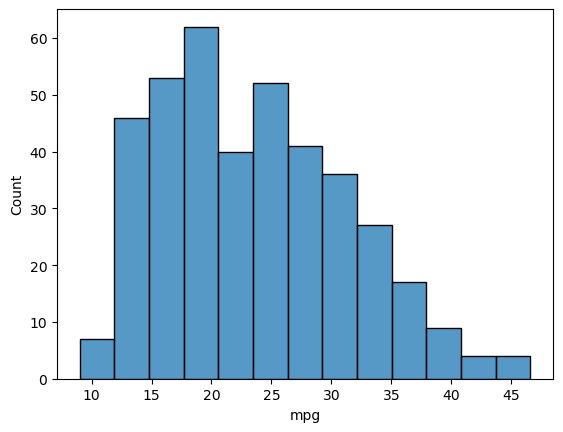

In [9]:
# Plot a histogram to visualize the distribution of the 'mpg' column
sns.histplot(mpg["mpg"]);

The histogram of the `mpg` values reveals that the distribution is approximately unimodal and slightly right-skewed. The majority of vehicles have `mpg` values between 15 and 25, with the highest frequency observed in the 15-20 range. The `mpg` values range from about 10 to 45, with fewer vehicles exhibiting extremely high or low fuel efficiency. This suggests that most vehicles in the dataset are moderately fuel-efficient, and there are few outliers. 

Likely a log transform may not be necessary in the modeling phase.

C:\Users\aojrz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


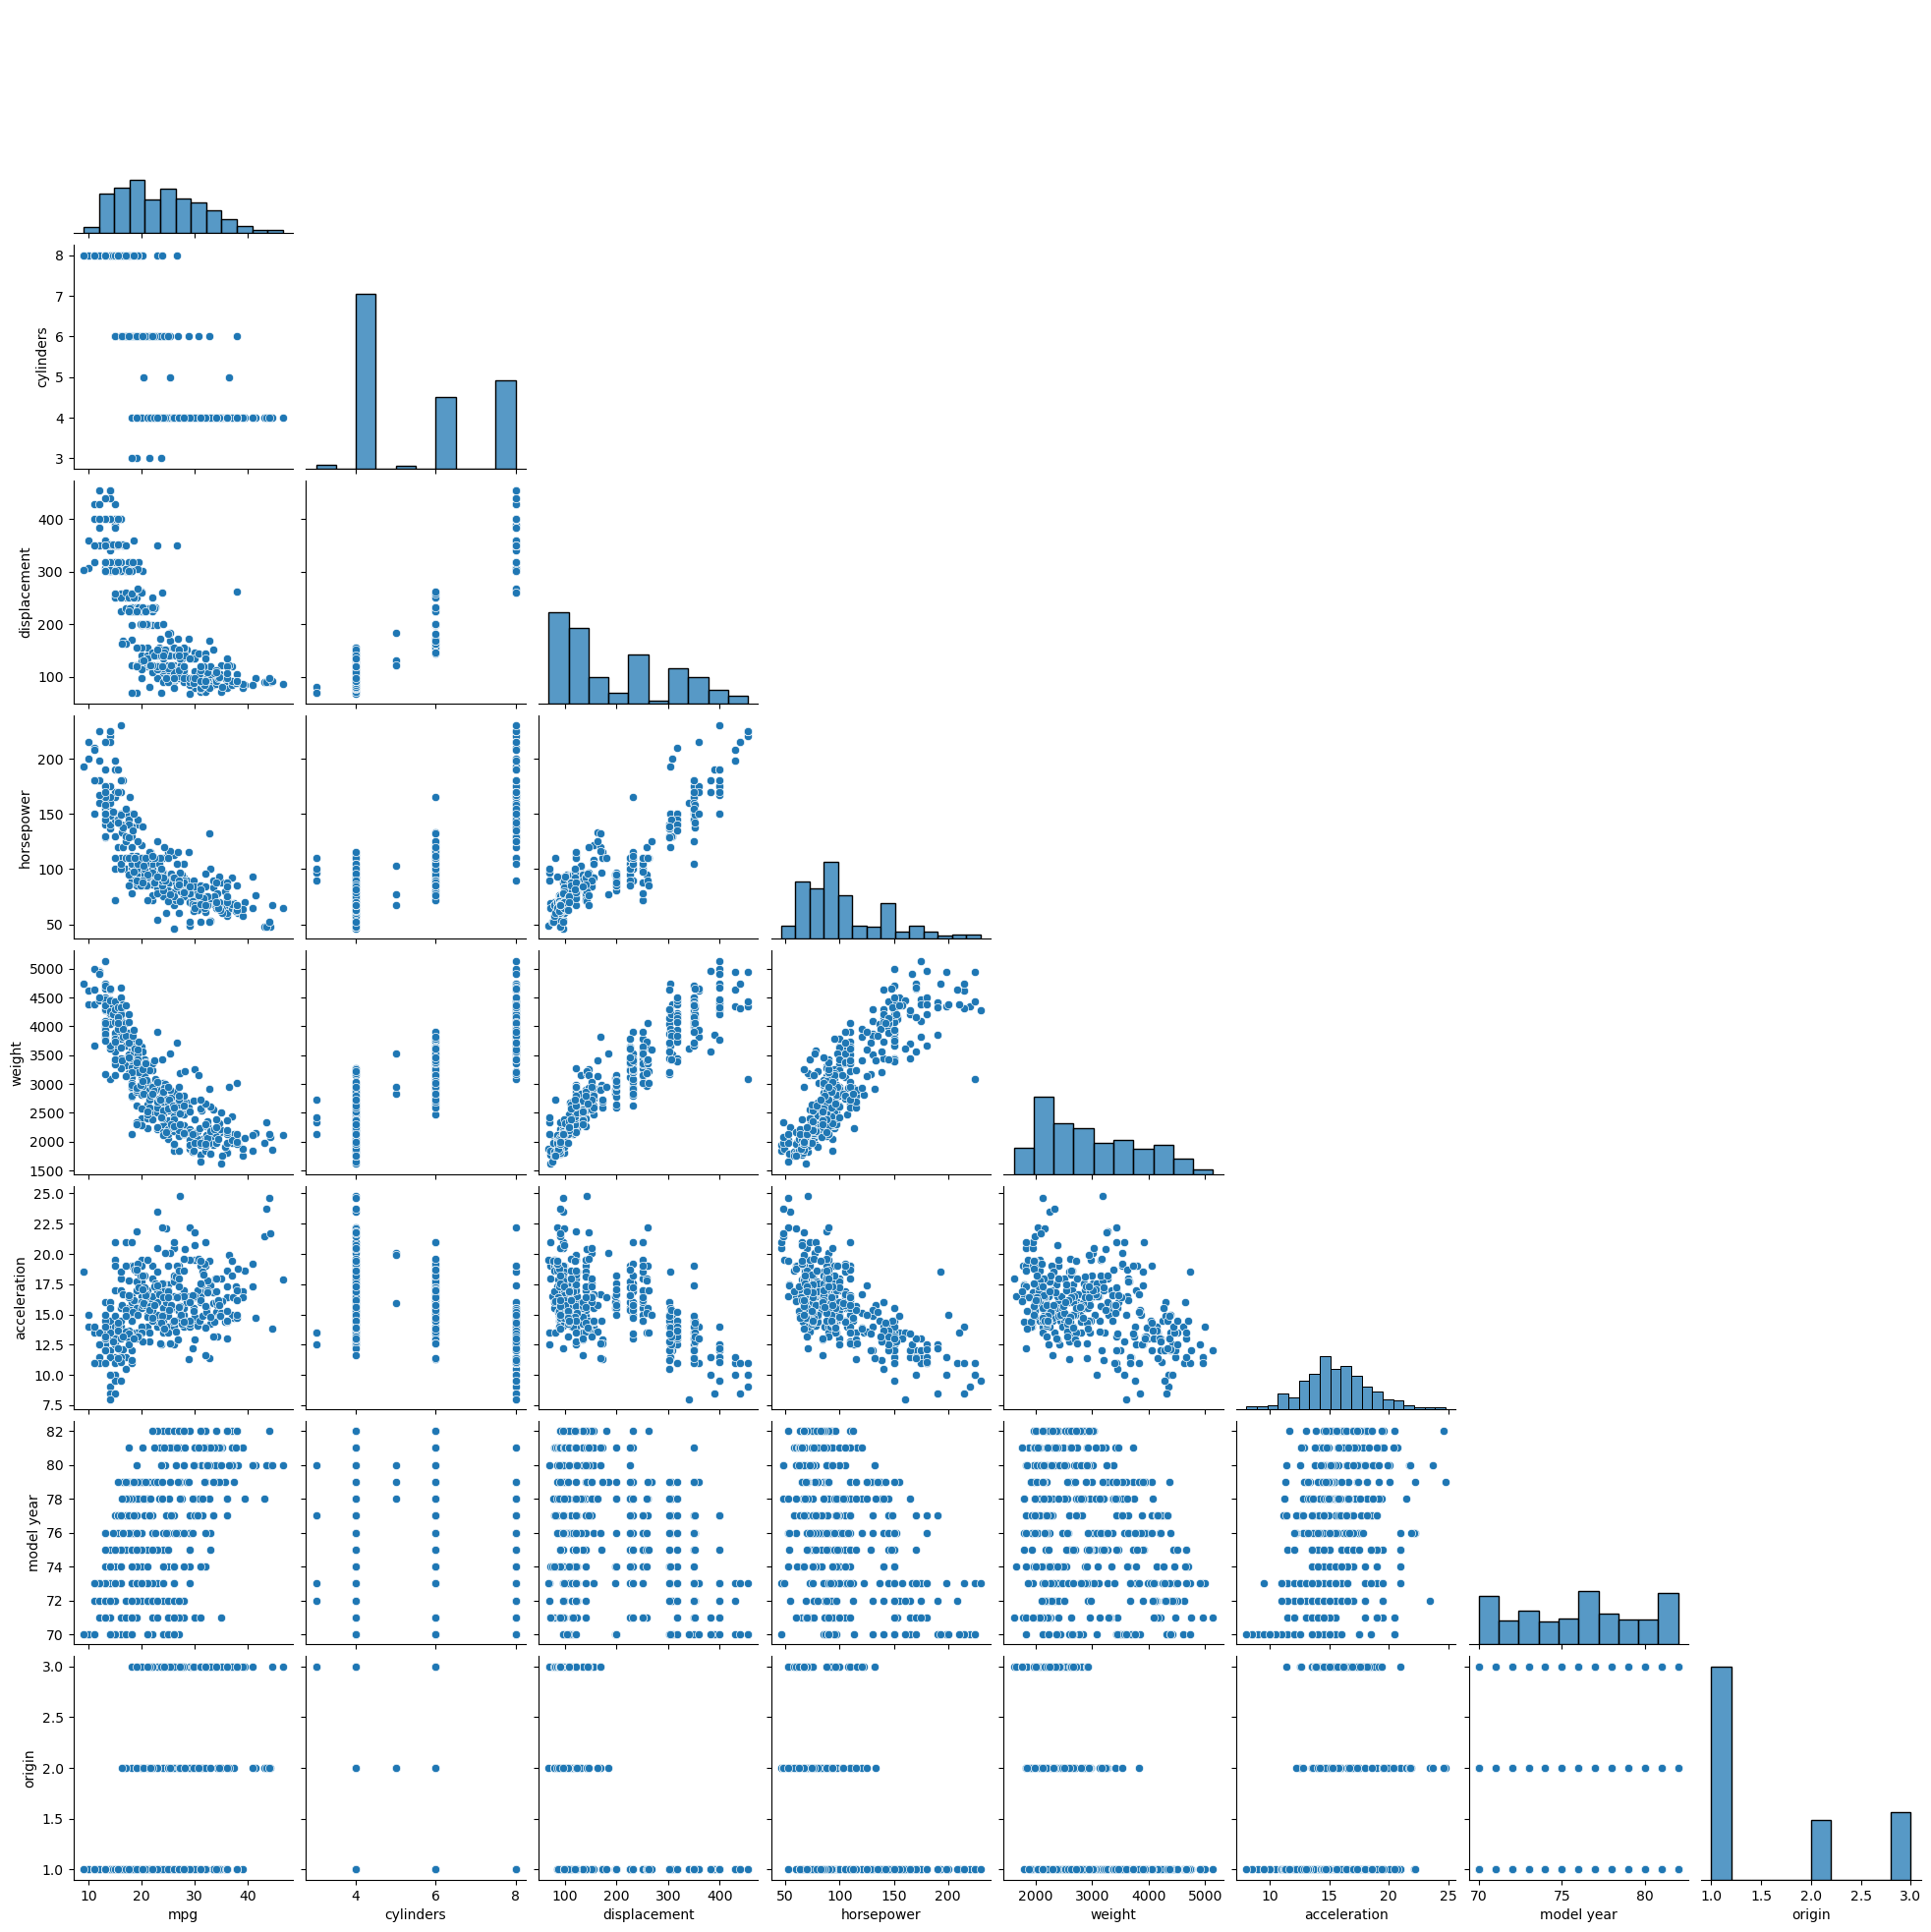

In [10]:
# Plot pairwise relationships in the dataset, showing only the lower triangle
sns.pairplot(mpg, corner=True);

The pairplot visualization showcases the relationships between various features in the dataset. Key observations include a strong negative correlation between `mpg` and features such as `weight`, `displacement`, and `horsepower`, indicating that higher values in these features are associated with lower fuel efficiency. Additionally, the distribution plots along the diagonal highlight the individual distributions of each feature. The scatter plots reveal potential non-linear relationships, particularly between `mpg` and `weight`, as well as clusters in the `cylinders` and `origin` features, suggesting categorical grouping.

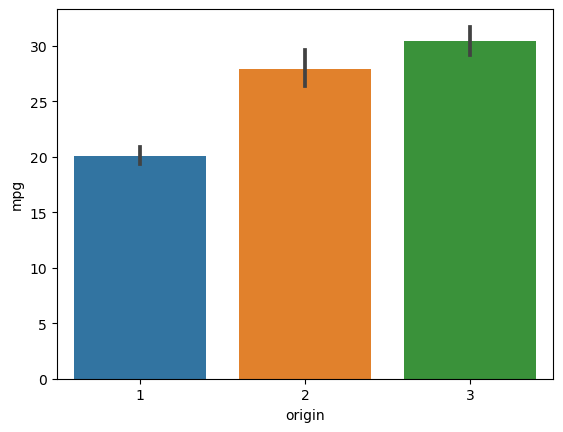

In [11]:
# Plot a bar chart to show the average 'mpg' for each 'origin'
sns.barplot(data=mpg, x="origin", y="mpg");

The bar chart illustrates the average `mpg` for vehicles based on their origin, categorized as 1 for USA, 2 for Europe, and 3 for Japan. The chart reveals that, on average, vehicles from Japan (category 3) have the highest fuel efficiency, followed by vehicles from Europe (category 2), while vehicles from the USA (category 1) have the lowest average `mpg`. This suggests that Japanese cars tend to be more fuel-efficient compared to their American and European counterparts. The error bars indicate the variability within each category, with a noticeable overlap between Europe and Japan, implying that while there is a general trend, individual vehicle efficiency can vary.

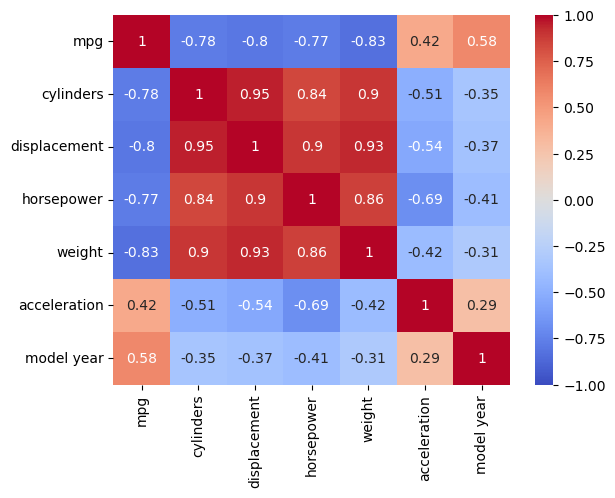

In [12]:
# Plot a heatmap to show the correlation matrix of numeric features
sns.heatmap(
    mpg.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    cmap="coolwarm",
    annot=True
);

The heatmap displays the correlation matrix for the numeric features in the dataset, highlighting the strength and direction of relationships between variables. The `mpg` (miles per gallon) shows strong negative correlations with `cylinders` (-0.78), `displacement` (-0.80), `horsepower` (-0.77), and `weight` (-0.83), indicating that higher values in these features are associated with lower fuel efficiency. Conversely, `mpg` has moderate positive correlations with `acceleration` (0.42) and `model year` (0.58). Among the features, `cylinders`, `displacement`, `horsepower`, and `weight` exhibit very high positive correlations with each other, suggesting multicollinearity.

# Split the Data and Train a Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae
import statsmodels.api as sm

import scipy.stats as stats
import matplotlib.pyplot as plt

In [14]:
# Create polynomial features for non-linear relationships and remove 'car name' column
mpg_model = mpg.assign(
    weight2 = mpg["weight"] ** 2,
    weight3 = mpg["weight"] ** 3,
    accel2 = mpg["acceleration"] ** 2,
    accel3 = mpg["acceleration"] ** 3,
    hp2 = mpg["horsepower"] ** 2,
    hp3 = mpg["horsepower"] ** 3
).drop('car name', axis=1)

# Reset the index and convert categorical variables into dummy/indicator variables
mpg_model.reset_index(drop=True, inplace=True)
mpg_model = pd.get_dummies(mpg_model, drop_first=True)

# Ensure that the 'origin' dummy variables are of integer type
mpg_model['origin_2'] = mpg_model['origin_2'].astype(int)
mpg_model['origin_3'] = mpg_model['origin_3'].astype(int)

# Inspect the modified dataframe
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,weight3,accel2,accel3,hp2,hp3,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,43022168064,144.00,1728.000,16900.0,2197000.0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,50366053557,132.25,1520.875,27225.0,4492125.0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,40565745856,121.00,1331.000,22500.0,3375000.0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,40459583737,144.00,1728.000,22500.0,3375000.0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,41027927849,110.25,1157.625,19600.0,2744000.0,0,0


In [15]:
# Define the features to be used in the model
features = [
    "weight",
    "weight2",
    "cylinders",
    "displacement",
    "horsepower",
    "hp2",
    "hp3",
    "acceleration",
    "accel2",
    "accel3",
    "model year",
    "origin_2",
    "origin_3"
]

# Prepare the feature matrix (X) and target vector (y)
X = sm.add_constant(mpg_model[features])
y = mpg["mpg"]

# Split the data into training and testing sets
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

In [16]:
# Initialize K-Fold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=2033)

# Lists to store R-squared and MAE values for each fold
cv_lm_r2s = []
cv_lm_mae = []

# Perform K-Fold cross-validation
for train_ind, val_ind in kf.split(X, y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    model = sm.OLS(y_train, X_train).fit()
    cv_lm_r2s.append(r2(y_val, model.predict(X_val),))
    cv_lm_mae.append(mae(y_val, model.predict(X_val),))

# Print R-squared values for each validation fold and their mean and standard deviation
print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")

# Print MAE values for each validation fold and their mean and standard deviation
print("All Validation MAEs: ", [round(x, 3) for x in cv_lm_mae])
print(f"Cross Val MAEs: {round(np.mean(cv_lm_mae), 3)} +- {round(np.std(cv_lm_mae), 3)}")

All Validation R2s:  [0.804, 0.843, 0.924, 0.916, 0.811]
Cross Val R2s: 0.86 +- 0.051
All Validation MAEs:  [2.482, 1.855, 1.907, 1.671, 2.864]
Cross Val MAEs: 2.156 +- 0.446


The K-fold cross-validation with 5 splits evaluates the performance of the linear regression model using R-squared and Mean Absolute Error (MAE) metrics. The R-squared values for the validation folds are [0.804, 0.843, 0.924, 0.916, 0.811], with a mean of 0.86 and a standard deviation of 0.051. This indicates that the model explains, on average, 86% of the variance in the `mpg` values with relatively low variability across the folds. 

The MAE values for the validation folds are [2.482, 1.855, 1.907, 1.671, 2.864], with a mean of 2.156 and a standard deviation of 0.446. These results suggest that the model's predictions deviate from the actual `mpg` values by approximately 2.156 mpg on average, demonstrating good predictive performance and consistency across the different subsets of the data.

In [17]:
# Function to create residual analysis plots
def residual_analysis_plots(model):
    predictions = model.predict()
    residuals = model.resid
    
    # Residual Plot
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    # Normal Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

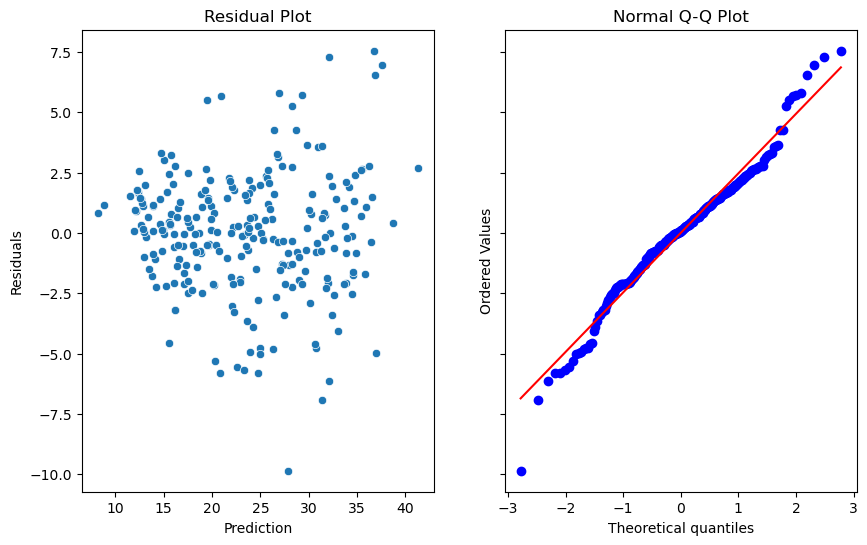

In [18]:
# Perform residual analysis on the last model from cross-validation
residual_analysis_plots(model)

The Residual Plot shows the residuals (differences between observed and predicted `mpg` values) plotted against the predicted values. The residuals appear to be randomly scattered around zero, indicating that the model's assumptions of linearity and homoscedasticity are reasonably met. 

The Normal Q-Q Plot compares the distribution of the residuals to a normal distribution. Most points lie on or near the red line, suggesting that the residuals are approximately normally distributed. However, there are some deviations at the tails, indicating potential outliers or non-normality in the extreme values. 

Overall, the plots suggest that the linear regression model is a good fit for the data, though there may be some areas for further investigation.

In [19]:
# Display the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     163.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.40e-111
Time:                        12:50:27   Log-Likelihood:                -593.30
No. Observations:                 255   AIC:                             1215.
Df Residuals:                     241   BIC:                             1264.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.0576     16.246      1.050      0.295     -14.945      49.060
weight          -0.0176      0.003     -6.551      0.000      -0.023      -0.012
weight2       1.966e-06    3.8e-07      5.175      0.000    1.22e-06    2.71e-06
cylinders        0.1926      0.349      0.552      0.581      -0.495       0.880
displacement    -0.0035      0.009     -0.385      0.700      -0.022       0.015
horsepower      -0.1015      0.123     -0.828      0.408      -0.343       0.140
hp2              0.0001      0.001      0.158      0.874      -0.002       0.002
hp3           3.026e-07   2.22e-06      0.136      0.892   -4.08e-06    4.68e-06
acceleration    -0.4238      2.803     -0.151      0.880      -5.945       5.097
accel2          -0.0782      0.167     -0.468      0.640      -0.407       0.251
accel3           0.0033      0.003      1.012      0.312      -0.003       0.010
model year       0.7885      0.051     15.444      0.000       0.688       0.889
origin_2         0.8043      0.584      1.376      0.170      -0.347       1.955
origin_3         0.8445      0.573      1.475      0.142      -0.284       1.973
==============================================================================
Omnibus:                       12.361   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               23.764
Skew:                          -0.209   Prob(JB):                     6.91e-06
Kurtosis:                       4.436   Cond. No.                     1.18e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Fit the final model on the entire training dataset
model = sm.OLS(y, X).fit()

# Display the summary of the final model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          8.92e-131
Time:                        12:50:27   Log-Likelihood:                -775.18
No. Observations:                 318   AIC:                             1578.
Df Residuals:                     304   BIC:                             1631.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.2387     14.131      0.937      0.350     -14.569      41.047
weight          -0.0163      0.003     -6.148      0.000      -0.022      -0.011
weight2       1.858e-06   3.78e-07      4.919      0.000    1.11e-06     2.6e-06
cylinders        0.2518      0.350      0.719      0.473      -0.438       0.941
displacement    -0.0063      0.009     -0.720      0.472      -0.024       0.011
horsepower      -0.1326      0.123     -1.075      0.283      -0.375       0.110
hp2              0.0003      0.001      0.317      0.751      -0.002       0.002
hp3           1.439e-07   2.27e-06      0.063      0.950   -4.33e-06    4.62e-06
acceleration    -0.7167      2.462     -0.291      0.771      -5.562       4.128
accel2          -0.0433      0.150     -0.289      0.773      -0.338       0.251
accel3           0.0023      0.003      0.761      0.447      -0.004       0.008
model year       0.8290      0.050     16.458      0.000       0.730       0.928
origin_2         1.1835      0.587      2.017      0.045       0.029       2.338
origin_3         1.2215      0.559      2.186      0.030       0.122       2.321
==============================================================================
Omnibus:                       19.803   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.407
Skew:                           0.290   Prob(JB):                     3.75e-10
Kurtosis:                       4.714   Cond. No.                     1.02e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The final linear regression model, fitted on the entire training dataset, yields an R-squared value of 0.879 and an adjusted R-squared of 0.874, indicating that approximately 87.9% of the variance in `mpg` is explained by the model. Significant predictors include `weight`, `weight2`, `model year`, `origin_2`, and `origin_3`, all with p-values less than 0.05, suggesting these variables are strong contributors to predicting fuel efficiency. The negative coefficient for `weight` and the positive coefficient for `weight2` indicate a non-linear relationship with `mpg`. The positive coefficients for `origin_2` and `origin_3` suggest that vehicles from Europe and Japan have higher fuel efficiency compared to those from the USA. The model diagnostics, including the Omnibus and Jarque-Bera tests, indicate some deviations from normality in the residuals, and the condition number suggests potential multicollinearity.

# Test and Interpret the Model

In [21]:
# Evaluate the model on the validation set and print the R-squared and MAE
print(f"Test R2: {r2(y_val, model.predict(X_val),)}")
print(f"Test MAE: {mae(y_val, model.predict(X_val),)}")

Test R2: 0.821136268905855
Test MAE: 2.7734956804065583


The model achieves a Test R-squared value of 0.821, indicating that 82.1% of the variance in `mpg` is explained by the model when applied to unseen data. The Test MAE is 2.77, suggesting that the model's predictions deviate from the actual `mpg` values by an average of 2.77 mpg. These results demonstrate that the model generalizes well to new data, maintaining a high level of predictive accuracy and relatively low error.

## Compare against Ridge Regression

In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature matrices
std = StandardScaler()
X_m = std.fit_transform(X.values) # Scale the training features
X_te = std.transform(X_test.values) # Scale the test features

In [23]:
from sklearn.linear_model import RidgeCV

# Define a range of alphas for RidgeCV to search over
n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

# Initialize RidgeCV with specified alphas and 5-fold cross-validation
ridge_model = RidgeCV(alphas=alphas, cv=5)

# Fit the Ridge Regression model on the standardized training data
ridge_model.fit(X_m, y)

# Print the R-squared score and MAE for the training data
print(ridge_model.score(X_m, y))
print(mae(y, ridge_model.predict(X_m)))

# Print the best alpha value found by RidgeCV
print(ridge_model.alpha_)

0.8787178554277879
2.0505054484945044
0.11226677735108136


In [24]:
# Evaluate the Ridge Regression model on the test set and print the R-squared and MAE
print(f"Test R2: {r2(y_test, ridge_model.predict(X_te))}")
print(f"Test MAE: {mae(y_test, ridge_model.predict(X_te))}")

Test R2: 0.8123760743507971
Test MAE: 2.2275816085914175


The Ridge Regression model, evaluated using 5-fold cross-validation, demonstrates a similar performance to the linear regression model. The Ridge Regression model achieves a training R-squared of 0.879 and a training MAE of 2.05. The best alpha value found by RidgeCV is approximately 0.112. On the test set, the Ridge Regression model attains a Test R-squared of 0.812 and a Test MAE of 2.23. In comparison, the linear regression model achieved a Test R-squared of 0.821 and a Test MAE of 2.77. 

While both models exhibit strong performance, the Ridge Regression model shows slightly better generalization with a lower Test MAE, suggesting it may be more robust in handling multicollinearity and providing more stable predictions. However, the differences are marginal, and either model could be considered based on the specific context and tolerance for prediction error.

# Conclusion

In this analysis, we built and evaluated linear and Ridge Regression models to predict the fuel efficiency (mpg) of vehicles based on various features such as weight, displacement, horsepower, acceleration, model year, and origin.

## Key Findings
1. **Data Insights**: The dataset contained 398 entries with no missing values, though the `horsepower` column required conversion to numeric format. Most vehicles had `mpg` values ranging from 15 to 25, with Japanese and European cars generally exhibiting higher fuel efficiency than American cars.
2. **Linear Regression Performance**: The linear regression model demonstrated strong performance with an R-squared value of 0.879 and a Mean Absolute Error (MAE) of 2.77 on the test set, indicating that it explained 87.9% of the variance in `mpg` values with a prediction error of approximately 2.77 mpg.
3. **Ridge Regression Performance**: The Ridge Regression model, which helps address multicollinearity by adding a regularization term, achieved a comparable R-squared value of 0.812 and a slightly better MAE of 2.23 on the test set. The best alpha value found was approximately 0.112.
4. **Significant Predictors**: Key predictors of fuel efficiency included `weight`, `weight2`, and `model year`, with negative and positive coefficients indicating a non-linear relationship. The `origin` feature also significantly impacted `mpg`, with Japanese and European cars being more fuel-efficient than American cars.
5. **Model Diagnostics**: Residual analysis and diagnostic plots confirmed that the models generally met the assumptions of linearity, homoscedasticity, and normality of residuals, though some deviations and potential multicollinearity were noted.

Both linear and Ridge Regression models provided strong predictive performance, with Ridge Regression offering slightly better generalization and stability. The analysis highlighted the critical factors affecting vehicle fuel efficiency, such as weight, model year, and origin, and demonstrated the value of regularization in handling multicollinearity. These findings can inform further optimization and deployment of predictive models for vehicle fuel efficiency, potentially guiding automotive design and consumer choices towards more efficient vehicles.
